In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_og = pd.read_csv("german_credit_data.csv",index_col=[0])

In [3]:
data_og.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [4]:
data_og.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
990,37,male,1,own,NaN,NaN,3565,12,education
991,34,male,1,own,moderate,NaN,1569,15,radio/TV
992,23,male,1,rent,NaN,little,1936,18,radio/TV
993,30,male,3,own,little,little,3959,36,furniture/equipment
994,50,male,2,own,NaN,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [5]:
data_og['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [6]:
data_og.shape

(1000, 9)

In [7]:
data_og.duplicated().sum()

0

In [8]:
data_og.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [9]:
data_og['Job'] = data_og['Job'].astype('object')

In [10]:
data_og.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [11]:
def range1(data):
    return max(data) - min(data)
print(f"Range of Age is {range1(data_og['Age'])}")
print(f"Range of Credit Amount is {range1(data_og['Credit amount'])}")
print(f"Range of Duration is {range1(data_og['Duration'])}")

Range of Age is 56
Range of Credit Amount is 18174
Range of Duration is 68


For Age, mean age is 35.5 with std dev of 11.3 , min age is 19 and max age is 75. Large range and high std dev may mean that we have some outliers.

For Credit Amount, mean is 3271 with std dev of 2823 , min is 250 and max age is 18424. Extremely high range and high std dev means that we have many outliers.

For Duration, mean is 21 with std dev of 13 , min is 4 and max age is 72. Large range and high std dev means that we have outliers.

Let's Check it now.


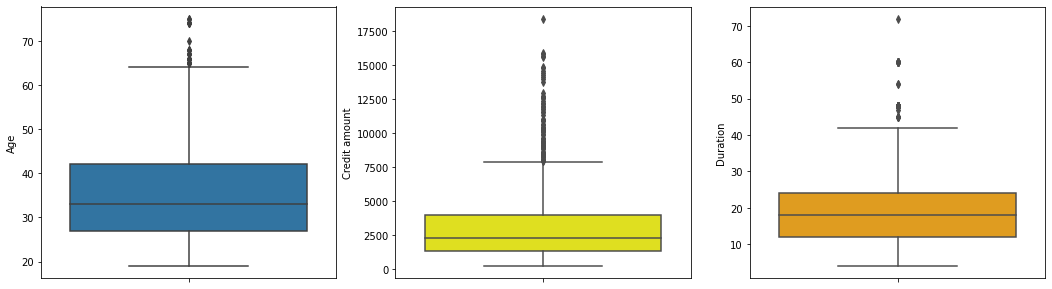

In [12]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.boxplot(data=data_og,y='Age')
plt.subplot(132)
sns.boxplot(data=data_og,y='Credit amount',color='yellow')
plt.subplot(133)
sns.boxplot(data=data_og,y='Duration',color='orange')
plt.show()

Outliers may or may not be deleted/changed as they may/may not have useful information. Here, in this case, Credit Amount is mostly taken by people aged 25-45 but it can also be taken by younger people for Tv/Education etc. and older people abopve 45 for their children or Repairs.

Similar reasoning can be given for credit amount and duration.

<AxesSubplot:>

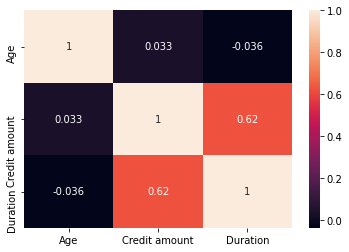

In [13]:
sns.heatmap(data_og.corr(),annot=True)

Credit amount and Duration have strong positive correlation meaning that as credit amount increases, duration also increases.

Also, correlation of job with credit amount and duration respectively is weakly positive. 

In [14]:
len(data_og)

1000

In [15]:
data_og.dtypes

Age                  int64
Sex                 object
Job                 object
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [16]:
data_og.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [17]:
data_og.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [18]:
data_og['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [19]:
data_og['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [20]:
list(data_og.select_dtypes('object').columns)

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [21]:
labels = list(data_og.columns)
labels

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

In [22]:
labels[4] = 'Savings_balance'
labels[5] = 'Checking_balance'
labels[6] = labels[6].replace(' ','_')

In [23]:
data_og.columns = labels

In [24]:
data_og.head()

,Age,Sex,Job,Housing,Savings_balance,Checking_balance,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Missing Value Treatment:

In [25]:
data_og['Savings_balance'] = data_og['Savings_balance'].fillna(data_og['Savings_balance'].mode())
data_og['Checking_balance'] = data_og['Checking_balance'].fillna(data_og['Checking_balance'].mode())

# Additional Info

In [26]:
data_og.head()

,Age,Sex,Job,Housing,Savings_balance,Checking_balance,Credit_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [27]:
data_og.groupby(['Purpose'],as_index=False)[['Credit_amount','Duration']].mean().sort_values(by='Credit_amount',ascending=False)

,Purpose,Credit_amount,Duration
7,vacation/others,8209.333333,32.333333
0,business,4158.041237,26.938144
1,car,3768.192878,20.813056
4,furniture/equipment,3066.988950,19.292818
3,education,2879.203390,19.677966
6,repairs,2728.090909,19.090909
5,radio/TV,2487.653571,20.046429
2,domestic appliances,1498.000000,16.833333


In [28]:
data_og.groupby(['Savings_balance'],as_index=False)['Duration'].mean()

,Savings_balance,Duration
0,little,20.417219
1,moderate,22.737864
2,quite rich,19.031746
3,rich,18.312500


In [29]:
data_og.groupby(['Housing'],as_index=False)['Credit_amount'].mean()

,Housing,Credit_amount
0,free,4906.212963
1,own,3060.939691
2,rent,3122.553073


<AxesSubplot:xlabel='Sex'>

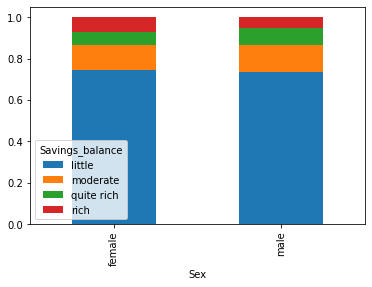

In [30]:
JH = pd.crosstab(data_og['Sex'],data_og['Savings_balance'])
JH.div(JH.sum(axis=1),axis=0).plot(kind='bar',stacked=True)

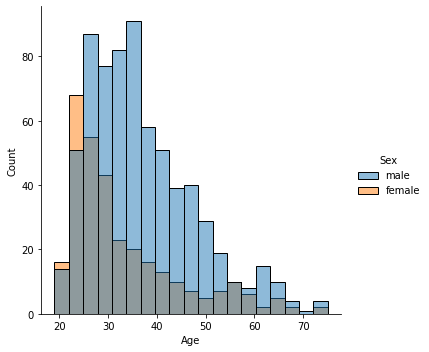

In [33]:
sns.displot(data = data_og, x='Age',hue='Sex')

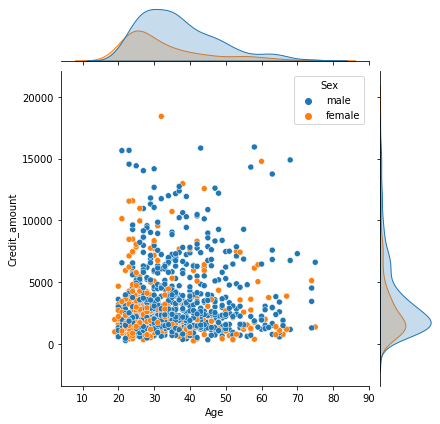

In [44]:
sns.jointplot(data = data_og, x='Age',y='Credit_amount',hue='Sex')